<a href="https://colab.research.google.com/github/ShikhaMaurya212402/Plant-Disease-Classification-Model/blob/main/PlantDiseaseModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.70G/2.70G [00:34<00:00, 82.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import glob as gb
import cv2

In [3]:
train = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [4]:
size = 224
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    preprocessing_function=None,
    validation_split=0.1
).flow_from_directory(
    train,
    target_size=(size, size),
    batch_size=164,
    class_mode='categorical',
    color_mode='rgb',
    subset='training',
    shuffle=True
)

Found 63282 images belonging to 38 classes.


In [5]:
train_generator

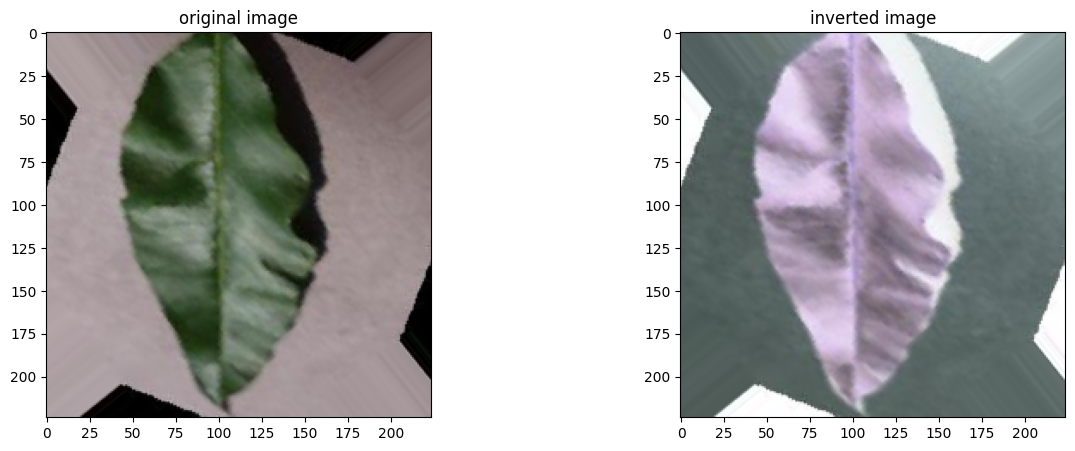

In [6]:
image, label  = train_generator[0]
fig,(ax1,ax2) = plt.subplots(figsize=(15,5),nrows=1,ncols=2)
ax1.imshow(image[0].transpose(1,0,2))
ax1.set_title("original image")
ax2.imshow(1-image[0].transpose(1,0,2))
ax2.set_title("inverted image")
plt.show()

In [7]:
for x, y in train_generator:
  print(x, x.shape)
  print(y, y.shape)
  break

[[[[6.3600373e-01 5.8502334e-01 6.5561157e-01]
   [6.5641600e-01 6.0543555e-01 6.7602384e-01]
   [7.1888232e-01 6.6790193e-01 7.3849016e-01]
   ...
   [6.0971308e-02 1.1889368e-02 7.6657586e-02]
   [4.4967417e-02 1.2201079e-03 6.0653694e-02]
   [6.2035564e-02 1.4173729e-02 7.7721834e-02]]

  [[6.5551203e-01 6.0453165e-01 6.7511988e-01]
   [6.3434428e-01 5.8336389e-01 6.5395212e-01]
   [6.6160154e-01 6.1062115e-01 6.8120939e-01]
   ...
   [4.3722868e-02 3.9040699e-04 5.9409145e-02]
   [6.3694961e-02 1.5418281e-02 7.9381235e-02]
   [5.8724292e-02 1.5636655e-02 7.4410565e-02]]

  [[6.6084671e-01 6.0986632e-01 6.8045455e-01]
   [6.5509719e-01 6.0411680e-01 6.7470503e-01]
   [6.3268489e-01 5.8170450e-01 6.5229273e-01]
   ...
   [6.5354370e-02 1.6662832e-02 8.1040643e-02]
   [5.6235190e-02 1.4392104e-02 7.1921460e-02]
   [2.9600032e-02 5.3726247e-04 4.5286309e-02]]

  ...

  [[7.1576667e-01 6.4910001e-01 7.2360981e-01]
   [7.1524841e-01 6.4858174e-01 7.2309154e-01]
   [7.1258110e-01 6.459144

In [8]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

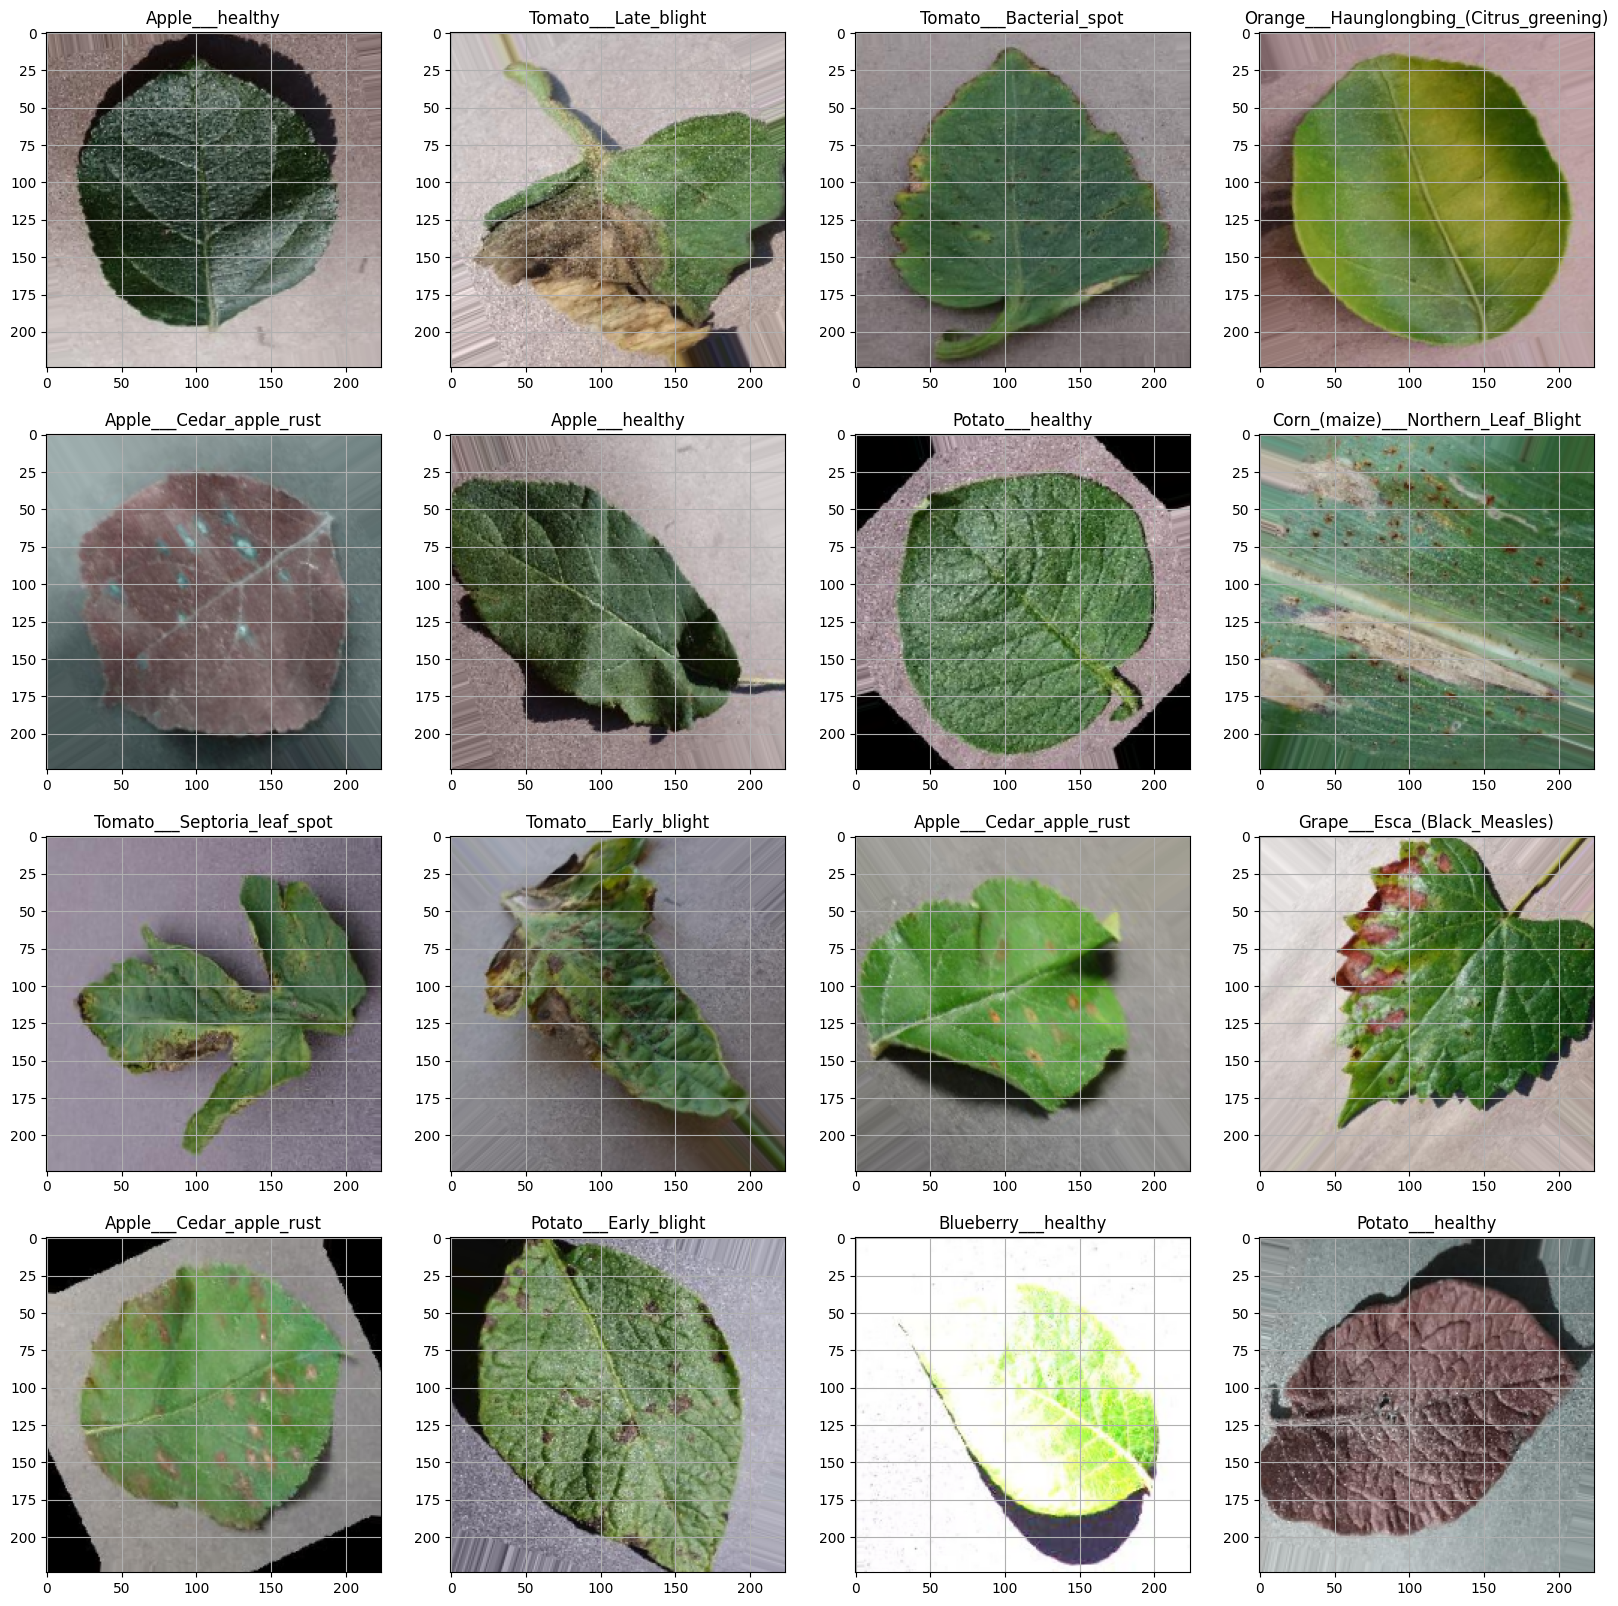

In [9]:
classes = list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
  for i in range(0, 16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_batch[i])
    plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    plt.grid(None)
  plt.show()
  break

In [10]:
valid = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [11]:
valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function = None,
    validation_split=0.1
).flow_from_directory(valid,
                      batch_size=164,
                      target_size=(size, size),
                      class_mode='categorical',
                      color_mode='rgb',
                      subset='validation',
                      shuffle=False)

Found 1742 images belonging to 38 classes.


In [12]:
test = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function = None
).flow_from_directory(test,
                      batch_size=164,
                      target_size=(224, 224),
                      color_mode='rgb',
                      class_mode = 'categorical',
                      shuffle = False)


Found 17572 images belonging to 38 classes.


In [13]:
test_generator.class_indices


{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

Building Model

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Dropout
from keras.models import Sequential


In [ ]:
def build_model(input_shape=(224, 224, 3), num_classes=38):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=input_shape),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),
        tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
        tf.keras.layers.Conv2D(128, 3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),
        tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
        tf.keras.layers.Conv2D(256, 3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),
        tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu'),
        tf.keras.layers.Conv2D(512, 3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1500, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [ ]:
model = build_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()



In [ ]:
#to avoid overshooting
# choose small learning rate default 0.001 we are taking 0.0001
# there may be a chance of underfiiting so increase the number of neuron

In [16]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[224, 224, 3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [18]:
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [19]:
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [20]:
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [21]:
model.add(Dropout(0.25))

In [22]:
model.add(tf.keras.layers.Flatten())

In [23]:
model.add(Dense(units=1500, activation='relu'))

In [24]:
model.add(Dropout(0.4))

In [25]:
#output layer
model.add(Dense(units=38, activation='softmax'))

In [26]:
#compliling model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 222, 222, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 111, 111, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 54, 54, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 10, 10, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │      19,201,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,970,762 (91.44 MB)

 Trainable params: 23,970,762 (91.44 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
#model training
training_history = model.fit(x=train_generator, validation_data=valid_generator, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 1050s 3s/step - accuracy: 0.1500 - loss: 3.0825 - val_accuracy: 0.4351 - val_loss: 1.9753
Epoch 2/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 876s 2s/step - accuracy: 0.5993 - loss: 1.3101 - val_accuracy: 0.6240 - val_loss: 1.2673
Epoch 3/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 874s 2s/step - accuracy: 0.7519 - loss: 0.7885 - val_accuracy: 0.7405 - val_loss: 0.8593
Epoch 4/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 873s 2s/step - accuracy: 0.8099 - loss: 0.5900 - val_accuracy: 0.6929 - val_loss: 1.0924
Epoch 5/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 870s 2s/step - accuracy: 0.8485 - loss: 0.4688 - val_accuracy: 0.8020 - val_loss: 0.6532
Epoch 6/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 871s 2s/step - accuracy: 0.8736 - loss: 0.3913 - val_accuracy: 0.7687 - val_loss: 0.7801
Epoch 7/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 878s 2s/step - accuracy: 0.8877 - loss: 0.3454 - val_accuracy: 0.8243 - val_loss: 0.5631
Epoch 8/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 872s 2s/step - accuracy: 0.9039 - loss: 0.2885 - val_acc

In [ ]:
def plot_history(history):
    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], 'r-', label='Training Acc')
    plt.plot(epochs, history.history['val_accuracy'], 'b--', label='Validation Acc')
    plt.title('Training & Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], 'r-', label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], 'b--', label='Validation Loss')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(training_history)


In [29]:
model.save('trained_model.h5')

In [30]:
model.save('trained_model.keras')

In [32]:
from google.colab import files
files.download('trained_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
training_history.history

{'accuracy': [0.2848835289478302,
  0.6514648795127869,
  0.769334077835083,
  0.8205335140228271,
  0.8534654378890991,
  0.8777061700820923,
  0.8910590410232544,
  0.9066243171691895,
  0.9171486496925354,
  0.9219051003456116],
 'loss': [2.519554853439331,
  1.1285765171051025,
  0.7286955118179321,
  0.5593698024749756,
  0.451579749584198,
  0.3777141571044922,
  0.3353819251060486,
  0.2807054817676544,
  0.25549861788749695,
  0.23542232811450958],
 'val_accuracy': [0.4351320266723633,
  0.6239954233169556,
  0.7405281066894531,
  0.6928817629814148,
  0.8019517660140991,
  0.7686567306518555,
  0.8243398666381836,
  0.8513203263282776,
  0.8547646403312683,
  0.8943743109703064],
 'val_loss': [1.9752551317214966,
  1.2672643661499023,
  0.8593112826347351,
  1.0923861265182495,
  0.6532189249992371,
  0.7801018357276917,
  0.5630615949630737,
  0.4995952546596527,
  0.48489993810653687,
  0.3388385474681854]}

In [33]:
#recording the history in json
import json
with open('training_hostory.json', 'w') as f:
  json.dump(training_history.history, f)

Accuracy Visualization


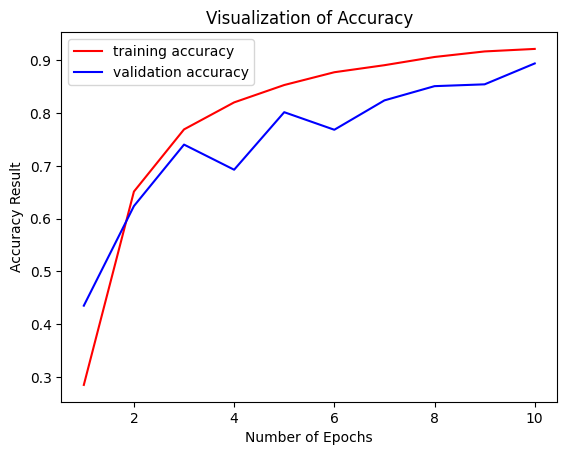

In [34]:
epochs = list(range(1, 11))
plt.plot(epochs, training_history.history['accuracy'], color='red', label='training accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Result')
plt.title("Visualization of Accuracy")
plt.legend()
plt.show()


some other metrics for model evaluation


In [ ]:
class_name =list(valid_generator.class_indices.keys())
print(class_name)
with open("class_labels.txt", "w") as f:
    for item in class_name:
        f.write("%s\n" % item)



['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [36]:
test_set = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [37]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32),
 (17572, 38))

In [38]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([27, 27, 22, ..., 36, 22, 37])>

In [39]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [40]:
y_true = tf.argmax(true_categories, axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.52      0.10      0.16       504
                                 Apple___Black_rot       0.57      0.66      0.61       497
                          Apple___Cedar_apple_rust       0.14      0.03      0.05       440
                                   Apple___healthy       0.67      0.03      0.06       502
                               Blueberry___healthy       0.86      0.29      0.44       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.03      0.06       421
                 Cherry_(including_sour)___healthy       0.37      0.13      0.19       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       1.00      0.01      0.01       410
                       Corn_(maize)___Common_rust_       0.98      0.59      0.73       477
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
cn = confusion_matrix(y_true, predicted_categories)
cn

array([[ 48,  52,   0, ...,   0,  15,  27],
       [  0, 329,   0, ...,   0,   3,   0],
       [  0,   0,  14, ...,   0,  19,  23],
       ...,
       [  0,   0,  58, ...,   0,  23,   0],
       [  0,   0,   0, ...,   0, 425,   8],
       [  0,   0,   0, ...,   0,  40, 350]])

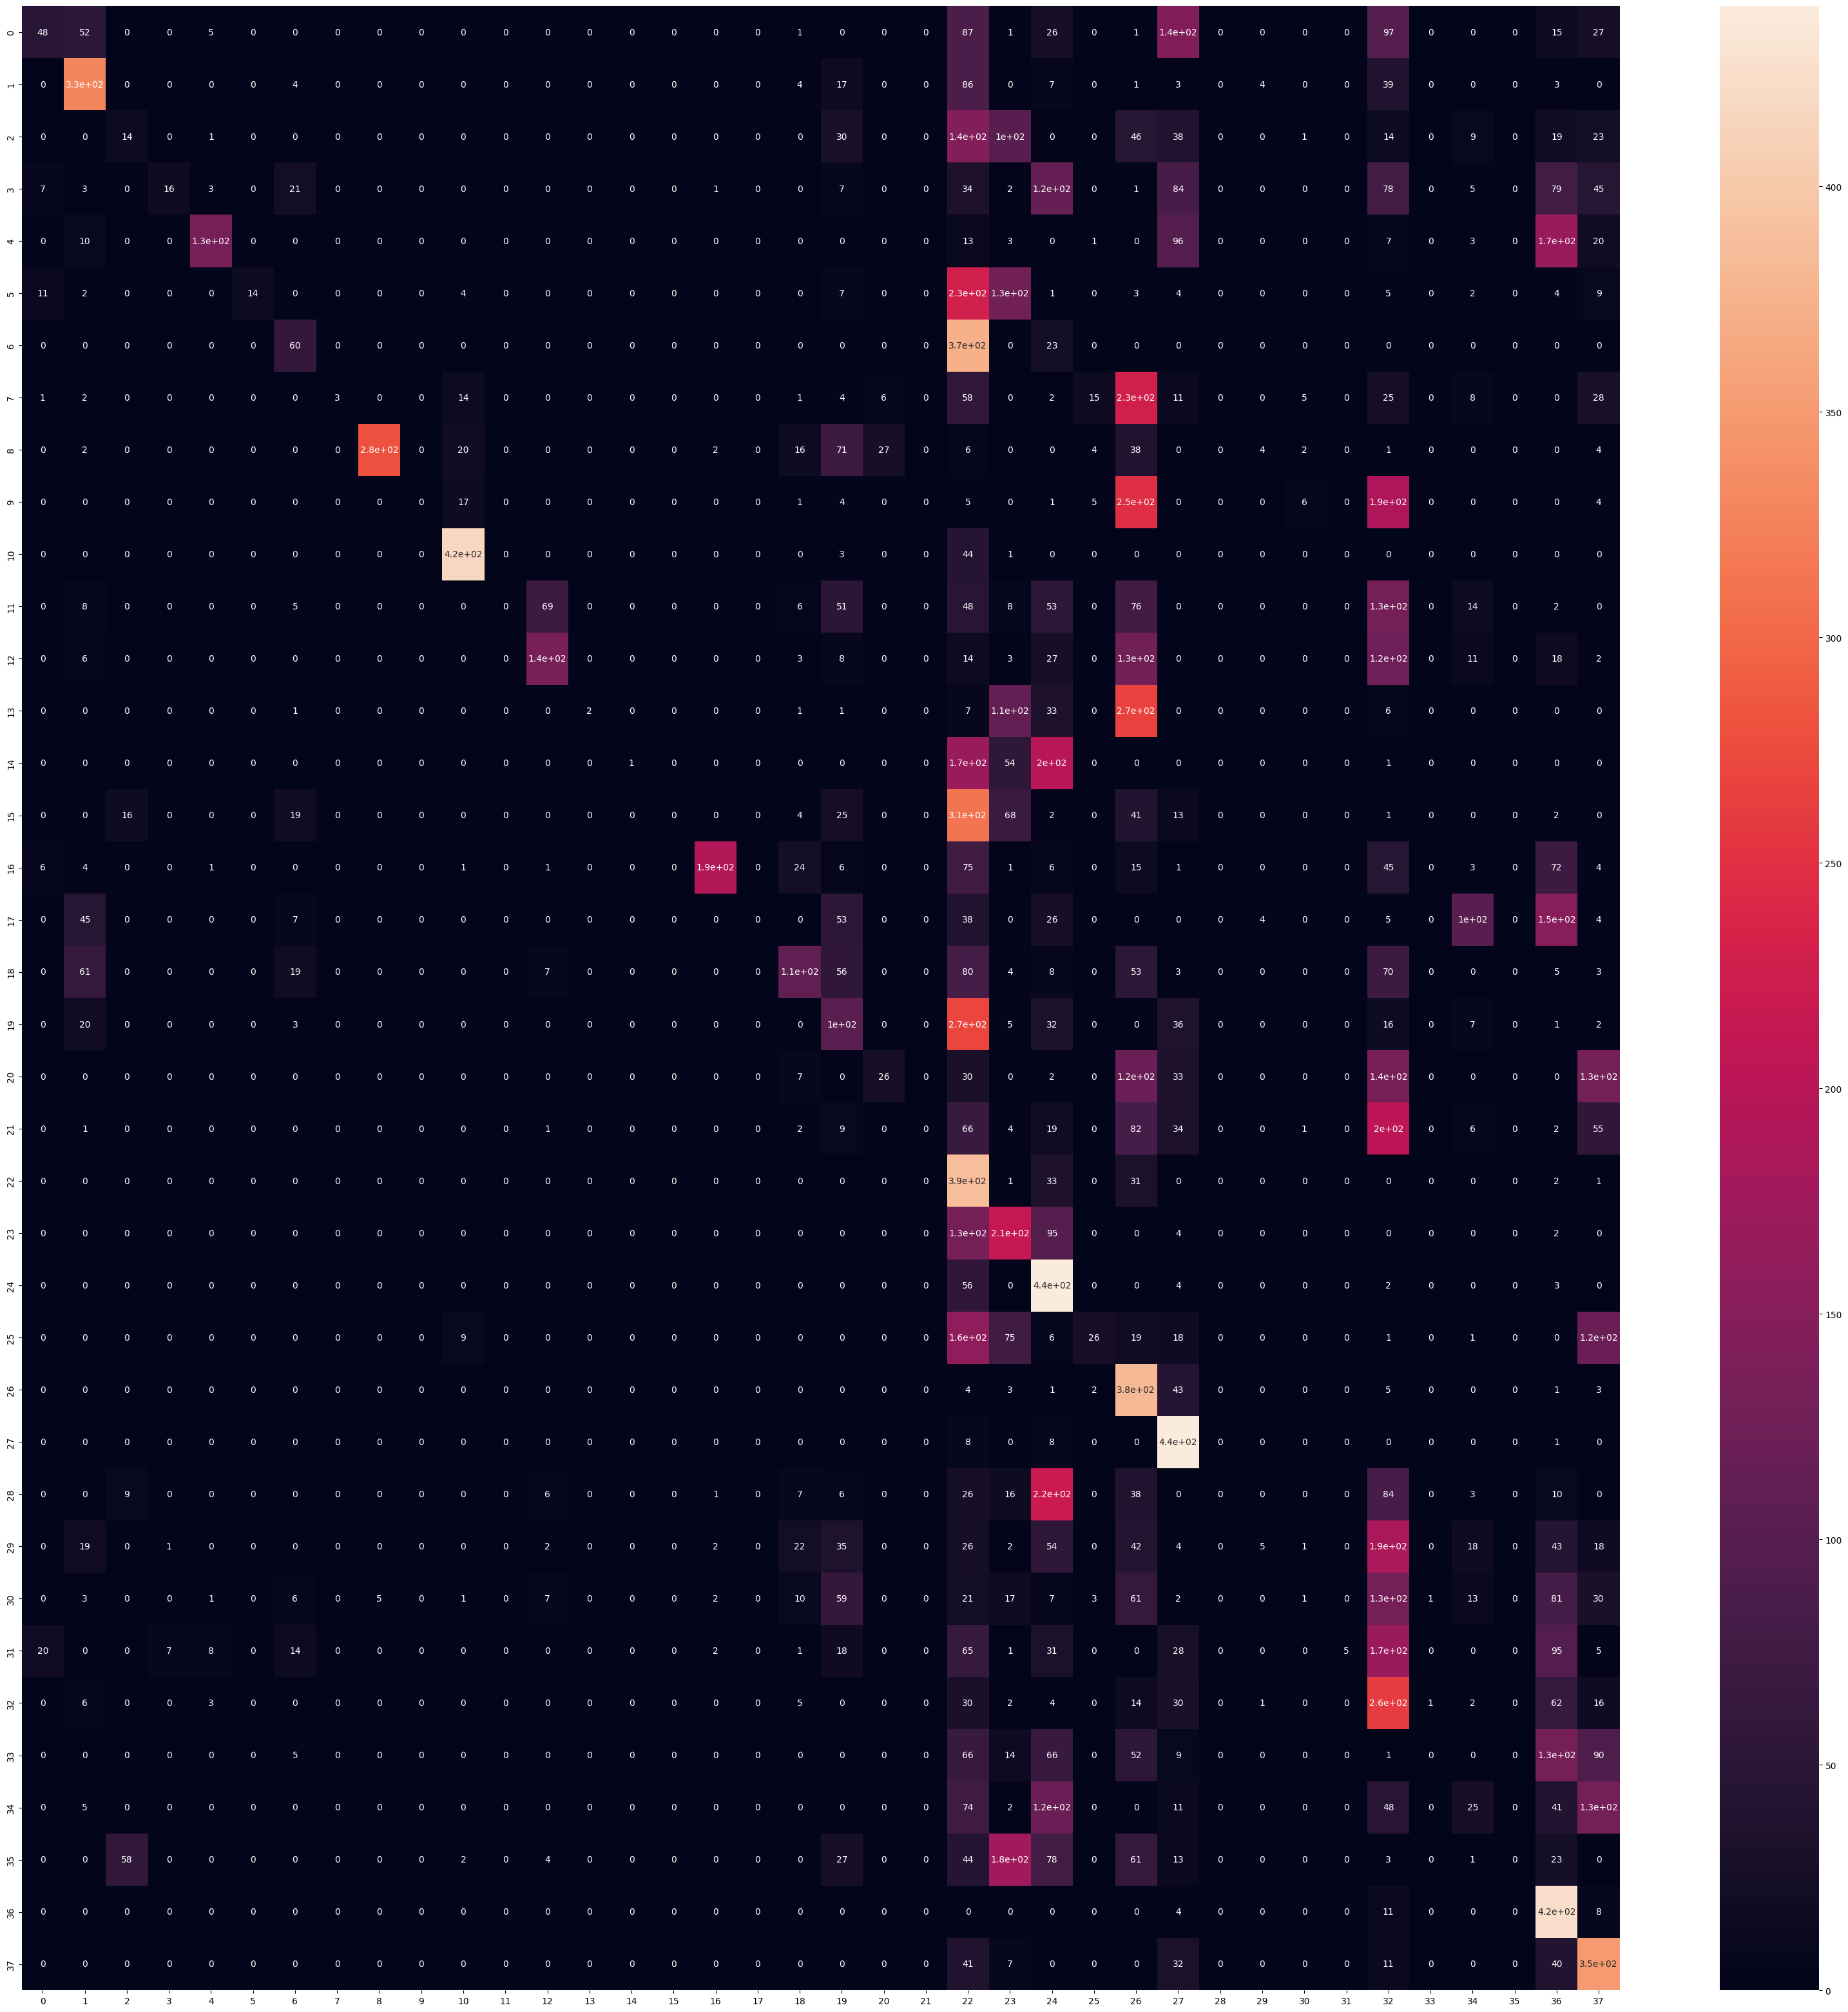

In [44]:
import seaborn as sns
plt.figure(figsize=(40,40))
sns.heatmap(cn, annot=True)
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image

def predict_plant_image(img_path, model, class_indices):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    class_labels = list(class_indices.keys())
    return class_labels[predicted_index]

# Example usage:
# print(predict_plant_image("/content/sample_leaf.jpg", model, train_generator.class_indices))
